In [1]:
%matplotlib widget

In [2]:
isdark = True

In [3]:
# initialization

from rayoptics.environment import *
import ipywidgets as widgets
import anytree

In [4]:
root_pth = Path(rayoptics.__file__).resolve().parent

In [5]:
app = AppManager(None)

Open file returns an OpticalModel instance. Recognizes CODE V .seq or ray-optics .roa JSON files

In [6]:
app.model = open_model(root_pth/"codev/tests/ag_dblgauss.seq")
opm = app.model
sm  = opm['seq_model']
osp = opm['optical_spec']
pm = opm['parax_model']
em = opm['ele_model']
pt = opm['part_tree']
ar = opm['analysis_results']

In [7]:
osp.defocus.get_focus()

-0.4002686453541377

In [8]:
osp.defocus.focus_shift

-0.4002686453541377

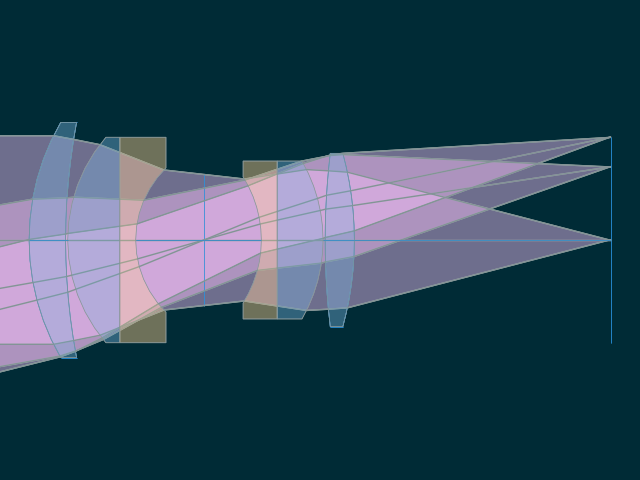

In [9]:
layout_plt = plt.figure(FigureClass=InteractiveLayout, opt_model=opm,
                        do_draw_rays=True, do_paraxial_layout=False, is_dark=isdark).plot()

In [10]:
sm.list_model()

              c            t        medium     mode   zdr      sd
  Obj:     0.000000  9.93938e+11       air             1  2.4782e+11
    1:     0.017793      8.75000    N-SSK2             1      28.172
    2:     0.006567     0.500000       air             1      27.136
    3:     0.026537      12.5000     N-SK2             1      24.626
    4:     0.000000      3.80000        F5             1      22.894
    5:     0.041269      16.3694       air             1      17.293
 Stop:     0.000000      13.7480       air             1      15.758
    7:    -0.035239      3.80000        F5             1      15.135
    8:     0.000000      11.0000    N-SK16             1      17.250
    9:    -0.026368     0.500000       air             1      18.926
   10:     0.005637      7.00000    N-SK16             1      20.349
   11:    -0.012593      61.4875       air             1      20.776
  Img:     0.000000      0.00000                       1      24.739


In [11]:
pm.first_order_data()

efl                 100
ffl              -29.32
pp1               70.68
bfl               61.49
ppk               38.52
f/#                   2
m            -1.006e-10
red          -9.939e+09
obj_dist      9.939e+11
obj_ang              14
enp_dist          57.91
enp_radius           25
na obj        2.515e-11
n obj                 1
img_dist          61.49
img_ht            24.93
exp_dist         -53.16
exp_radius        28.66
na img          -0.2425
n img                 1
optical invariant        6.233


In [12]:
fo.list_parax_trace(opm)

stop surface: 6
           y           u           n*i         ybar         ubar        n*ibar
 0            0  2.51525e-11  2.51525e-11 -2.47817e+11     0.249328     0.249328
 1           25    -0.170628     0.444821     -14.4391     0.252237  -0.00758437
 2       23.507    -0.180751   -0.0263896      -12.232     0.359218     0.278896
 3      23.4166    -0.347265     0.440667     -12.0524     0.344338    0.0393784
 4      19.0758    -0.348123    -0.558186     -7.74817     0.345189     0.553482
 5      17.7529    -0.116096     0.616549     -6.43645     0.393199     0.127574
 6      15.8525    -0.116096    -0.116096 -1.74801e-06     0.393199     0.393199
 7      14.2564      0.11666    -0.618485      5.40568     0.316914     0.202706
 8      14.6998     0.115437     0.187054      6.60996     0.313591     0.508146
 9      15.9696   -0.0741853    -0.495263      10.0595     0.343587    0.0783442
10      15.9325   -0.0801657    0.0156197      10.2313     0.189957     0.401257
11      15.371

In [13]:
opm['pt'].list_tree()

root
├── Object
│   └── p
│       └── i0
├── Object space
│   └── t
│       └── g0
├── E1
│   ├── p1
│   │   └── i1
│   ├── t
│   │   └── g1
│   └── p2
│       └── i2
├── AG1
│   └── t
│       └── g2
├── CE1
│   ├── p1
│   │   └── i3
│   ├── t1
│   │   └── g3
│   ├── p2
│   │   └── i4
│   ├── t2
│   │   └── g4
│   └── p3
│       └── i5
├── AG2
│   └── t
│       └── g5
├── Stop
│   └── p
│       └── i6
├── AG3
│   └── t
│       └── g6
├── CE2
│   ├── p1
│   │   └── i7
│   ├── t1
│   │   └── g7
│   ├── p2
│   │   └── i8
│   ├── t2
│   │   └── g8
│   └── p3
│       └── i9
├── AG4
│   └── t
│       └── g9
├── E2
│   ├── p1
│   │   └── i10
│   ├── t
│   │   └── g10
│   └── p2
│       └── i11
├── Image space
│   └── t
│       └── g11
└── Image
    └── p
        └── i12


In [14]:
opm['pt'].list_tree(lambda node: f"{node.name}: {node.tag}", childiter=opm['pt'].get_child_filter(tag='#element#assembly#dummyifc'))

root: #group#root
├── Object: #dummyifc#object
├── E1: #element#lens
├── CE1: #element#cemented
├── Stop: #dummyifc#stop
├── CE2: #element#cemented
├── E2: #element#lens
└── Image: #dummyifc#image


In [15]:
opm['pt'].list_tree(attrname='name', childiter=opm['pt'].get_child_filter(tag='#element#assembly#dummyifc'))

root
├── Object
├── E1
├── CE1
├── Stop
├── CE2
├── E2
└── Image


In [16]:
def children_with_tag(children):
    return opm['pt'].nodes_with_tag(node_list=children, tag='#element#assembly')

In [17]:
print(anytree.RenderTree(opm['pt'].root_node, childiter=list).by_attr(attrname='name'))

root
├── Object
│   └── p
│       └── i0
├── Object space
│   └── t
│       └── g0
├── E1
│   ├── p1
│   │   └── i1
│   ├── t
│   │   └── g1
│   └── p2
│       └── i2
├── AG1
│   └── t
│       └── g2
├── CE1
│   ├── p1
│   │   └── i3
│   ├── t1
│   │   └── g3
│   ├── p2
│   │   └── i4
│   ├── t2
│   │   └── g4
│   └── p3
│       └── i5
├── AG2
│   └── t
│       └── g5
├── Stop
│   └── p
│       └── i6
├── AG3
│   └── t
│       └── g6
├── CE2
│   ├── p1
│   │   └── i7
│   ├── t1
│   │   └── g7
│   ├── p2
│   │   └── i8
│   ├── t2
│   │   └── g8
│   └── p3
│       └── i9
├── AG4
│   └── t
│       └── g9
├── E2
│   ├── p1
│   │   └── i10
│   ├── t
│   │   └── g10
│   └── p2
│       └── i11
├── Image space
│   └── t
│       └── g11
└── Image
    └── p
        └── i12


In [18]:
print(anytree.RenderTree(opm['pt'].root_node, childiter=children_with_tag).by_attr(attrname='name'))

root
├── E1
├── CE1
├── CE2
└── E2


In [19]:
opm['pt'].list_tree_full()

root: #group#root
├── Object: #dummyifc#object
│   └── p: #profile
│       └── i0: #ifc
├── Object space: #airgap#object
│   └── t: #thic
│       └── g0: #gap
├── E1: #element#lens
│   ├── p1: #profile
│   │   └── i1: #ifc
│   ├── t: #thic
│   │   └── g1: #gap
│   └── p2: #profile
│       └── i2: #ifc
├── AG1: #airgap
│   └── t: #thic
│       └── g2: #gap
├── CE1: #element#cemented
│   ├── p1: #profile
│   │   └── i3: #ifc
│   ├── t1: #thic
│   │   └── g3: #gap
│   ├── p2: #profile
│   │   └── i4: #ifc
│   ├── t2: #thic
│   │   └── g4: #gap
│   └── p3: #profile
│       └── i5: #ifc
├── AG2: #airgap
│   └── t: #thic
│       └── g5: #gap
├── Stop: #dummyifc#stop
│   └── p: #profile
│       └── i6: #ifc
├── AG3: #airgap
│   └── t: #thic
│       └── g6: #gap
├── CE2: #element#cemented
│   ├── p1: #profile
│   │   └── i7: #ifc
│   ├── t1: #thic
│   │   └── g7: #gap
│   ├── p2: #profile
│   │   └── i8: #ifc
│   ├── t2: #thic
│   │   └── g8: #gap
│   └── p3: #profile
│       └── i9: #ifc
├── 

In [20]:
em.list_model()

0: Object (DummyInterface): Surface(lbl='Obj', profile=Spherical(c=0.0), interact_mode='dummy')
1: E1 (Element): Element: Spherical(c=0.01779284094091543), Spherical(c=0.006566600536925569), t=8.7500, sd=28.1719, glass: N-SSK2
2: CE1 (CementedElement): CementedElement: [3, 4, 5]
3: Stop (DummyInterface): Surface(profile=Spherical(c=0.0), interact_mode='transmit')
4: CE2 (CementedElement): CementedElement: [7, 8, 9]
5: E2 (Element): Element: Spherical(c=0.005636604951748545), Spherical(c=-0.0125926458590576), t=7.0000, sd=20.7763, glass: N-SK16
6: Image (DummyInterface): Surface(lbl='Img', profile=Spherical(c=0.0), interact_mode='dummy')


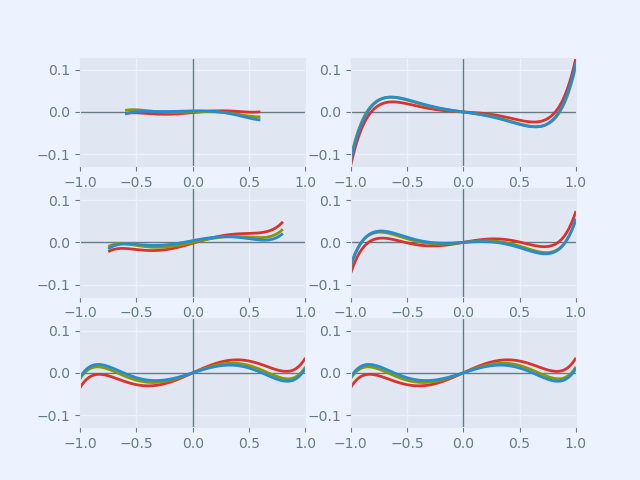

In [21]:
abr_plt = plt.figure(FigureClass=RayFanFigure, opt_model=opm, data_type='Ray', scale_type=Fit.All_Same).plot()

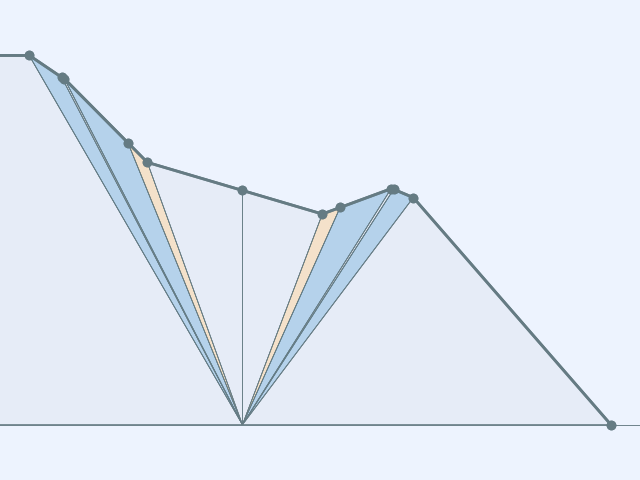

In [22]:
yybar_plt = plt.figure(FigureClass=InteractiveDiagram, opt_model=opm, dgm_type='ht').plot()

In [24]:
# compute 3rd order aberrations
ax_ray, pr_ray, fod = ar['parax_data']
u_last = ax_ray[-1][mc.slp]
central_wv = opm.nm_to_sys_units(sm.central_wavelength())
n_last = pm.sys[-1][mc.indx]
to_df = compute_third_order(opm)

tr_df=to_df.apply(to.seidel_to_transverse_aberration, axis='columns', args=(n_last,u_last))
out = widgets.Output()
wv_df=to_df.apply(to.seidel_to_wavefront, axis='columns', args=(central_wv,))
with out:
    display(to_df)
    display(wv_df)
display(out)

fcv=to.seidel_to_field_curv(to_df.loc['sum'], n_last, fod.opt_inv)

Output()

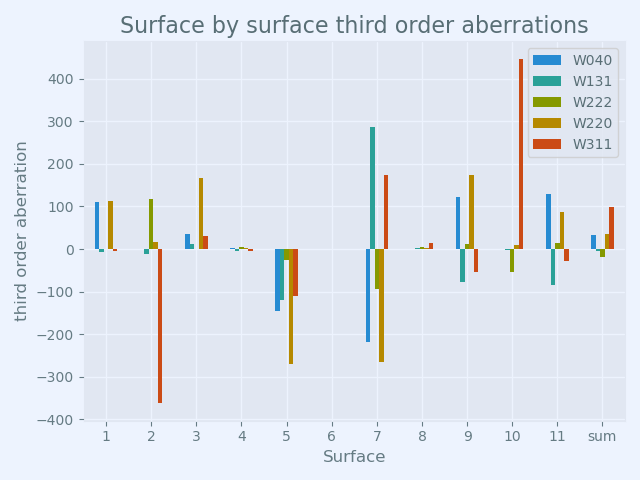

In [25]:
# display bar chart
fig, ax = plt.subplots()
ax.set_xlabel('Surface')
ax.set_ylabel('third order aberration')
ax.set_title('Surface by surface third order aberrations')
wv_df.plot.bar(ax=ax, rot=0)
ax.grid(True)
fig.tight_layout()

In [26]:
list_ray(osp['fov'].fields[2].chief_ray[0][0])

            X            Y            Z           L            M            N               Len
  0:      0.00000 -247816674315.63208            0     0.000000     0.241922     0.970296   1.0244e+12
  1:      0.00000    -14.40611       1.8777     0.000000     0.247498     0.968888        7.625
  2:      0.00000    -12.51894      0.51544     0.000000     0.350483     0.936569       2.0119
  3:      0.00000    -11.81380       1.8997     0.000000     0.336461     0.941697       11.257
  4:      0.00000     -8.02641            0     0.000000     0.336512     0.941679       4.9388
  5:      0.00000     -6.36444      0.85076     0.000000     0.381121     0.924525       16.786
  6:      0.00000      0.03288            0     0.000000     0.381121     0.924525       14.293
  7:      0.00000      5.48006     -0.53417     0.000000     0.310441     0.950593       4.5594
  8:      0.00000      6.89549            0     0.000000     0.307972     0.951395       10.146
  9:      0.00000     10.02002   

In [27]:
fld2=osp['fov'].fields[2]

In [28]:
fld2.ref_sphere

(array([ 0.        , 24.5887392 , -0.40026865]),
 array([0.        , 0.20119957, 0.97955027]),
 122.21069565962846)

In [29]:
sm.gaps[-1].thi=61.0875

In [30]:
opm.update_model()

In [31]:
listobj(osp['fov'])

field: object angle; value=0.0
x,y=0.0 vlx= 0.000 vux= 0.000 vly= 0.000 vuy= 0.000
y=10.0000000023 vly= 0.250 vuy= 0.200 vlx= 0.000 vux= 0.000
y=14.0000000032 vly= 0.400 vuy= 0.400 vlx= 0.000 vux= 0.000



In [32]:
fo.list_parax_trace(opm)

stop surface: 6
           y           u           n*i         ybar         ubar        n*ibar
 0            0  2.51525e-11  2.51525e-11 -2.47817e+11     0.249328     0.249328
 1           25    -0.170628     0.444821     -14.4391     0.252237  -0.00758437
 2       23.507    -0.180751   -0.0263896      -12.232     0.359218     0.278896
 3      23.4166    -0.347265     0.440667     -12.0524     0.344338    0.0393784
 4      19.0758    -0.348123    -0.558186     -7.74817     0.345189     0.553482
 5      17.7529    -0.116096     0.616549     -6.43645     0.393199     0.127574
 6      15.8525    -0.116096    -0.116096 -1.74801e-06     0.393199     0.393199
 7      14.2564      0.11666    -0.618485      5.40568     0.316914     0.202706
 8      14.6998     0.115437     0.187054      6.60996     0.313591     0.508146
 9      15.9696   -0.0741853    -0.495263      10.0595     0.343587    0.0783442
10      15.9325   -0.0801657    0.0156197      10.2313     0.189957     0.401257
11      15.371

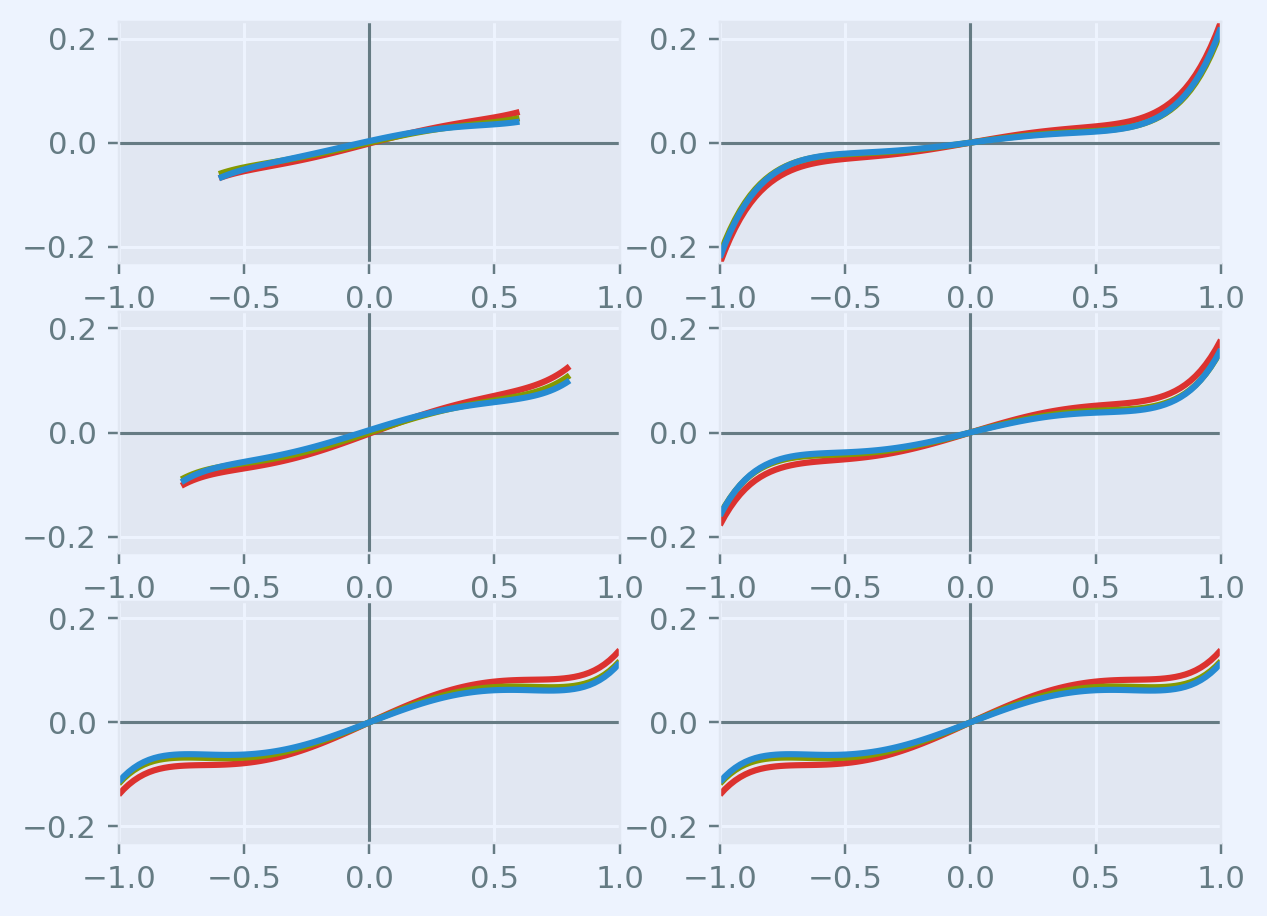

In [33]:
abr_plt.refresh()

In [34]:
list_ray(osp['fov'].fields[2].chief_ray[0][0])

            X            Y            Z           L            M            N               Len
  0:      0.00000 -247816674315.63208            0     0.000000     0.241922     0.970296   1.0244e+12
  1:      0.00000    -14.40611       1.8777     0.000000     0.247498     0.968888        7.625
  2:      0.00000    -12.51894      0.51544     0.000000     0.350483     0.936569       2.0119
  3:      0.00000    -11.81380       1.8997     0.000000     0.336461     0.941697       11.257
  4:      0.00000     -8.02641            0     0.000000     0.336512     0.941679       4.9388
  5:      0.00000     -6.36444      0.85076     0.000000     0.381121     0.924525       16.786
  6:      0.00000      0.03288            0     0.000000     0.381121     0.924525       14.293
  7:      0.00000      5.48006     -0.53417     0.000000     0.310441     0.950593       4.5594
  8:      0.00000      6.89549            0     0.000000     0.307972     0.951395       10.146
  9:      0.00000     10.02002   

In [35]:
osp['fov'].fields[2].ref_sphere

(array([ 0.        , 24.50614481, -0.40026865]),
 array([0.        , 0.2011962 , 0.97955096]),
 121.80222192312823)

In [36]:
osp.defocus.focus_shift

-0.4002686453541377